<a href="https://colab.research.google.com/github/ludawg44/jigsawlabs/blob/master/31Mar20_2_exploring_data_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Data with Fema

### Introduction

In this lesson, we'll look at FEMA claims data gathered for the [Washington Post's article on Houston Flooding](https://www.washingtonpost.com/graphics/2017/investigations/harvey-urban-planning/) which they made available [here](https://github.com/wpinvestigative/fema_claims).  Let's load up the data and see what we have.

### Loading the Data

In [0]:
import pandas as pd 
url = "https://raw.githubusercontent.com/jigsawlabs-student/exploring-pandas/master/formatted_claims_all.txt"
df = pd.read_csv(url, sep='\t')

Use head to take a look at the first five rows of data.

In [0]:
first_five = df.head()
first_five

# 	state	county	community	total_loss	closed_loss	open_loss	cwop_loss	total_pay
# 0	ALABAMA	AUTAUGA COUNTY	AUTAUGA COUNTY *	33.0	23.0	2.0	8.0	518669.96
# 1	ALABAMA	AUTAUGA COUNTY	AUTAUGAVILLE, TOWN OF	1.0	0.0	0.0	1.0	0.00
# 2	ALABAMA	AUTAUGA COUNTY	MILLBROOK, CITY OF	9.0	6.0	0.0	3.0	74633.64
# 3	ALABAMA	AUTAUGA COUNTY	MONTGOMERY, CITY OF	295.0	195.0	6.0	94.0	4113018.78
# 4	ALABAMA	AUTAUGA COUNTY	PRATTVILLE, CITY OF	45.0	35.0	3.0	7.0	700387.26

,state,county,community,total_loss,closed_loss,open_loss,cwop_loss,total_pay
0,ALABAMA,AUTAUGA COUNTY,AUTAUGA COUNTY *,33.0,23.0,2.0,8.0,518669.96
1,ALABAMA,AUTAUGA COUNTY,"AUTAUGAVILLE, TOWN OF",1.0,0.0,0.0,1.0,0.00
2,ALABAMA,AUTAUGA COUNTY,"MILLBROOK, CITY OF",9.0,6.0,0.0,3.0,74633.64
3,ALABAMA,AUTAUGA COUNTY,"MONTGOMERY, CITY OF",295.0,195.0,6.0,94.0,4113018.78
4,ALABAMA,AUTAUGA COUNTY,"PRATTVILLE, CITY OF",45.0,35.0,3.0,7.0,700387.26


Let's try to get a sense of what these loss and pay columns mean.  A quick Google search takes us to [the following data dictionary](https://www.fema.gov/data-definitions-claim-information-state-and-policy-information-state).

<img src="https://github.com/jigsawlabs-student/exploring-pandas/blob/master/data-dictionary-fema.png?raw=1" width="50%">

### Reducing our Data

So it looks like the data in the total loss column is a sum of the other loss columns.  Let's confirm that.

Find a dataframe (or a series) selecting all of the rows where the sum of the other columns does not equal the total losses column.  If we see that almost all are equal, we know this is duplicate information.

In [0]:
df.head()

,state,county,community,total_loss,closed_loss,open_loss,cwop_loss,total_pay
0,ALABAMA,AUTAUGA COUNTY,AUTAUGA COUNTY *,33.0,23.0,2.0,8.0,518669.96
1,ALABAMA,AUTAUGA COUNTY,"AUTAUGAVILLE, TOWN OF",1.0,0.0,0.0,1.0,0.00
2,ALABAMA,AUTAUGA COUNTY,"MILLBROOK, CITY OF",9.0,6.0,0.0,3.0,74633.64
3,ALABAMA,AUTAUGA COUNTY,"MONTGOMERY, CITY OF",295.0,195.0,6.0,94.0,4113018.78
4,ALABAMA,AUTAUGA COUNTY,"PRATTVILLE, CITY OF",45.0,35.0,3.0,7.0,700387.26


In [0]:
df.shape

(15533, 8)

In [0]:
loss_cols = ['closed_loss', 'open_loss', 'cwop_loss']
df_loss = df[loss_cols]
df_loss.head()

,closed_loss,open_loss,cwop_loss
0,23.0,2.0,8.0
1,0.0,0.0,1.0
2,6.0,0.0,3.0
3,195.0,6.0,94.0
4,35.0,3.0,7.0


In [0]:
loss_cols = ['closed_loss', 'open_loss', 'cwop_loss']
df_loss = df[loss_cols]

not_eq_total = df_loss.map(lambda 'closed_loss'+)

In [0]:
not_eq_total.shape
# (56, 3)

NameError: ignored

Now let's look at the entire dataset to see what portion of these columns are not equal.

In [0]:
df.shape

(15533, 8)

It looks like the total loss column is, as the kids say, [extra](https://www.urbandictionary.com/define.php?term=extra). Let's get rid of it.

In [0]:
reduced_df = df.drop('total_loss',axis=1)

In [0]:
reduced_df.columns
# Index(['state', 'county', 'community', 'closed_loss', 'open_loss', 'cwop_loss',
#        'total_pay'],

Index(['state', 'county', 'community', 'closed_loss', 'open_loss', 'cwop_loss',
       'total_pay'],
      dtype='object')

Now let's take a look at the missing data.  Let's get a count of the missing values across the columns.

In [0]:
reduced_df.isnull().sum()
# write code here to count the missing values across columns

# state           0
# county          0
# community       0
# closed_loss    56
# open_loss      56
# cwop_loss      56
# total_pay      56

state           0
county          0
community       0
closed_loss    56
open_loss      56
cwop_loss      56
total_pay      56
dtype: int64

It looks like when one column is missing, the rest are also missing.  Let's confirm this.  Select all of the rows where just `closed_loss` is `na`.

In [0]:
closed_loss_na = reduced_df[reduced_df['closed_loss'].isnull()]
closed_loss_na.head()

,state,county,community,closed_loss,open_loss,cwop_loss,total_pay
242,ALASKA,--------------------------------,--------------------------------,NaN,NaN,NaN,NaN
264,AMERICAN SAMOA,--------------------------------,--------------------------------,NaN,NaN,NaN,NaN
266,ARIZONA,--------------------------------,--------------------------------,NaN,NaN,NaN,NaN
355,ARKANSAS,--------------------------------,--------------------------------,NaN,NaN,NaN,NaN
624,CALIFORNIA,--------------------------------,--------------------------------,NaN,NaN,NaN,NaN


In [0]:
closed_loss_na.shape
# (56, 7)

(56, 7)

Let's take a look.

In [0]:
closed_loss_na[:3]

# 	state	county	community	closed_loss	open_loss	cwop_loss	total_pay
# 242	ALASKA	--------------------------------	--------------------------------	NaN	NaN	NaN	NaN
# 264	AMERICAN SAMOA	--------------------------------	--------------------------------	NaN	NaN	NaN	NaN
# 266	ARIZONA	--------------------------------	--------------------------------	NaN	NaN	NaN	NaN

,state,county,community,closed_loss,open_loss,cwop_loss,total_pay
242,ALASKA,--------------------------------,--------------------------------,NaN,NaN,NaN,NaN
264,AMERICAN SAMOA,--------------------------------,--------------------------------,NaN,NaN,NaN,NaN
266,ARIZONA,--------------------------------,--------------------------------,NaN,NaN,NaN,NaN


Ok, if we look across all of the rows, we can see that each row is completely blank.  It appears that this may be simply a list of the states and territories.

In [0]:
closed_loss_na.state[:5]
# 242            ALASKA
# 264    AMERICAN SAMOA
# 266           ARIZONA
# 355          ARKANSAS
# 624        CALIFORNIA
# Name: state, dtype: object

242            ALASKA
264    AMERICAN SAMOA
266           ARIZONA
355          ARKANSAS
624        CALIFORNIA
Name: state, dtype: object

Ok, it seems safe to drop each of these rows.  Remove the rows that have missing data and assign the result to the variable `reduced_no_missing`.

In [0]:
reduced_no_missing = reduced_df.dropna()

In [0]:
reduced_no_missing.shape

# (15477, 7)

(15477, 7)

### Exploring Data

Now that we've cleaned up some of our data, let's do a check to see that our data is of the correct type, before we attempt to perform any analysis.

In [0]:
reduced_df.info()
# check the datatypes of the reduced_no_missing dataframe.

# state           object
# county          object
# community       object
# closed_loss    float64
# open_loss      float64
# cwop_loss      float64
# total_pay      float64
# dtype: object


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        15533 non-null  object 
 1   county       15533 non-null  object 
 2   community    15533 non-null  object 
 3   closed_loss  15477 non-null  float64
 4   open_loss    15477 non-null  float64
 5   cwop_loss    15477 non-null  float64
 6   total_pay    15477 non-null  float64
dtypes: float64(4), object(3)
memory usage: 849.6+ KB


Ok, looks good.

Now let's get a sense of some of our data.  We have data from all fifty states, but let's just focus on Texas for now.

In [0]:
texas_df = reduced_no_missing[reduced_no_missing['state']=='TEXAS']
texas_df

,state,county,community,closed_loss,open_loss,cwop_loss,total_pay
13220,TEXAS,ANDERSON COUNTY,ANDERSON COUNTY*,7.0,0.0,0.0,117796.83
13221,TEXAS,ANDERSON COUNTY,"PALESTINE, CITY OF",3.0,0.0,3.0,59415.17
13222,TEXAS,ANGELINA COUNTY,ANGELINA COUNTY *,18.0,0.0,2.0,464133.26
13223,TEXAS,ANGELINA COUNTY,"DIBOLL, CITY OF",5.0,0.0,2.0,45053.93
13224,TEXAS,ANGELINA COUNTY,"HUNTINGTON, CITY OF",0.0,0.0,1.0,0.00
...,...,...,...,...,...,...,...
14111,TEXAS,YOUNG COUNTY,"OLNEY, CITY OF",6.0,0.0,3.0,62690.04
14112,TEXAS,YOUNG COUNTY,YOUNG COUNTY *,31.0,0.0,1.0,301090.07
14113,TEXAS,ZAPATA COUNTY,ZAPATA COUNTY *,1.0,0.0,0.0,35000.00
14114,TEXAS,ZAVALA COUNTY,"CRYSTAL CITY, CITY OF",27.0,0.0,11.0,180167.82


In [0]:
texas_df.shape

(896, 7)

This seems a little more manageable.

Ok, let's try creating a histogram of all of our numeric columns.

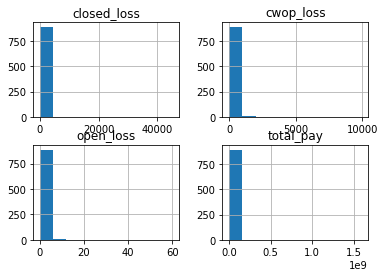

In [0]:
ax = texas_df.hist()

> Answer <img src="https://github.com/jigsawlabs-student/exploring-pandas/blob/master/hist-tx-fema.png?raw=1" width="50%">

Hmm, not very useful.  It looks like outliers are expanding the range of our data.  Let's choose just the `closed_loss` column, which remember represents a count of the losses that have been paid.  Set an range on the x values at 10000, with 500 bins.  Label. the x axis `no. claims` and the y axis `count`, and assign a title of `TX closed claims by county`.

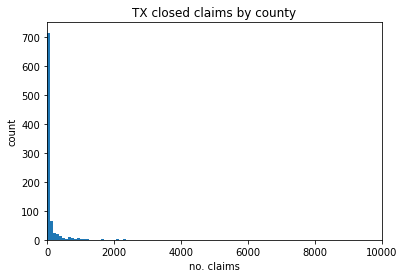

In [0]:
import matplotlib.pyplot as plt
ax = texas_df['closed_loss'].plot(kind='hist', xlim=[0,10000], bins=500, title='TX closed claims by county')
ax.set(ylabel='count', xlabel='no. claims')
plt.show()

> Answer: <img src="https://github.com/jigsawlabs-student/exploring-pandas/blob/master/tx-closed-claims-style.png?raw=1" width="50%">

Ok, perhaps a little better, but not great.  Let's use `describe` to see if it can help us set a range for our data of closed losses.

In [0]:
texas_df['closed_loss'].describe()
# count      896.000000
# mean       241.588170
# std       1922.330777
# min          0.000000
# 25%          2.000000
# 50%         10.500000
# 75%         59.250000
# max      45059.000000

count      896.000000
mean       241.588170
std       1922.330777
min          0.000000
25%          2.000000
50%         10.500000
75%         59.250000
max      45059.000000
Name: closed_loss, dtype: float64

Ok, so it looks like most of our data is between 2 and 59 claims, and there's a max of 45000 claims.

Let's get an even more detailed sense of how our `closed_loss` data breaks down by looking at value_counts, and selecting just the top five values.

In [0]:
texas_df['closed_loss'].value_counts()[:5]

# 1.0    101
# 2.0     89
# 4.0     53
# 3.0     45
# 0.0     40
# 5.0     31
# Name: closed_loss, dtype: int64

1.0    101
2.0     89
4.0     53
3.0     45
0.0     40
5.0     31
Name: closed_loss, dtype: int64

And we can use the `normalize` argument to get a sense of what percentage of the data we are talking about.

> Select the first six rows and assign to `percent_of_values`.

In [0]:
percent_of_values = texas_df['closed_loss'].value_counts(normalize= True)[:5]


In [0]:
percent_of_values

# 1.0    0.112723
# 2.0    0.099330
# 4.0    0.059152
# 3.0    0.050223
# 0.0    0.044643
# 5.0    0.034598

1.0    0.112723
2.0    0.099330
4.0    0.059152
3.0    0.050223
0.0    0.044643
5.0    0.034598
Name: closed_loss, dtype: float64

In [0]:
percent_of_values.sum()

0.4006696428571429

So we can see that 40 percent of the counties had between 0 and 5 claims.

> Now depending on our research, this data in itself may be interesting.  For example, this is still closed FEMA flooding claims, so perhaps this percent goes up or down over time.

For now, let's focus on the data with claims above 2, the interquartile range.

Let's start by just plotting what's roughly the data roughly in the interquartile range (the range between the 25th and 75th percentile).  Here that would technically be data between 2 and 59, but let's choose data between 2 and 60.

> To do so, first select just the rows where the number of claims is between 6 and 50, and assign the resulting dataframe to `texas_iqr`.

In [0]:
texas_df.describe(include='all')

,state,county,community,closed_loss,open_loss,cwop_loss,total_pay
count,896,896,896,896.000000,896.000000,896.000000,8.960000e+02
unique,1,210,895,NaN,NaN,NaN,NaN
top,TEXAS,HARRIS COUNTY,"UNCERTAIN, CITY OF",NaN,NaN,NaN,NaN
freq,896,37,2,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,241.588170,0.283482,58.645089,7.697927e+06
std,NaN,NaN,NaN,1922.330777,2.262148,413.078773,6.933265e+07
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00
25%,NaN,NaN,NaN,2.000000,0.000000,1.000000,3.195163e+04
50%,NaN,NaN,NaN,10.500000,0.000000,3.000000,1.851045e+05
75%,NaN,NaN,NaN,59.250000,0.000000,16.000000,1.140188e+06


In [0]:
texas_df.sample(10)

,state,county,community,closed_loss,open_loss,cwop_loss,total_pay
13611,TEXAS,HALE COUNTY,"PLAINVIEW, CITY OF",7.0,0.0,5.0,92602.87
13389,TEXAS,CHEROKEE COUNTY,"JACKSONVILLE, CITY OF",4.0,0.0,3.0,24458.66
13314,TEXAS,BRAZORIA COUNTY,"HOLIDAY LAKES, TOWN OF",14.0,0.0,6.0,771525.95
13578,TEXAS,GALVESTON COUNTY,"LA MARQUE, CITY OF",1014.0,0.0,296.0,12110849.00
13305,TEXAS,BRAZORIA COUNTY,"ANGLETON, CITY OF",717.0,0.0,139.0,6770427.72
13985,TEXAS,STEPHENS COUNTY,"BRECKENRIDGE, CITY OF",41.0,0.0,5.0,706507.78
13285,TEXAS,BEXAR COUNTY,"SELMA, CITY OF",3.0,0.0,2.0,16647.18
13550,TEXAS,FORT BEND COUNTY,PECAN GROVE M.U.D.,45.0,0.0,12.0,1041748.48
13945,TEXAS,ROBERTSON COUNTY,"CALVERT, CITY OF",1.0,0.0,0.0,3965.98
13790,TEXAS,LAVACA COUNTY,LAVACA COUNTY*,8.0,0.0,0.0,462174.10


In [0]:
type(texas_df['closed_loss'])

pandas.core.series.Series

In [0]:
texas_iqr = texas_df[(2 < texas_df['closed_loss']) & (texas_df['closed_loss'] < 60)]

In [0]:
texas_iqr.shape
# (442, 7)

(442, 7)

Let's see how this compares to the rest of our Texas data.

In [0]:
texas_df.shape

(896, 7)

So now we are zooming in on roughly half of our data.

Plot the closed losses, and set an x range between 4 and 60, and a y range between 0 and 35.

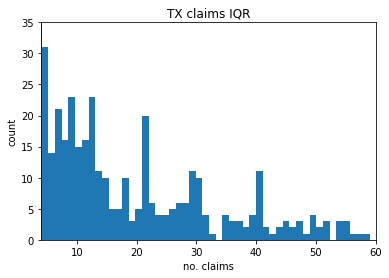

In [0]:
axs2 = texas_iqr['closed_loss'].plot(kind='hist', xlim=[4,60], ylim=[0,35], bins=50)
axs2.set(title='TX claims IQR', ylabel='count', xlabel='no. claims')
plt.show()


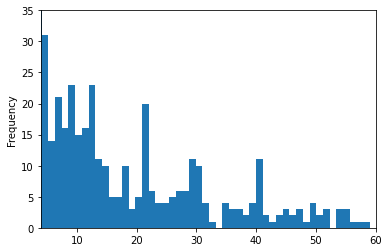

In [0]:
texas_iqr['closed_loss'].plot(kind='hist', xlim=[4,60], ylim=[0,35], bins=50)

> Answer <img src="https://github.com/jigsawlabs-student/exploring-pandas/blob/master/tx-claims-iqr.png?raw=1" width="40%">

Ok, now what be even more interesting is focusing on the counties that have the most amount of claims.

We can look at the values at the higher percentiles the `describe` method and using the percentiles method.  Set percentiles of `.85, .90, .95` and `.99`. 

In [0]:
texas_df['closed_loss'].describe(percentiles=[.85, .90, .95, .99])

# count      896.000000
# mean       241.588170
# std       1922.330777
# min          0.000000
# 50%         10.500000
# 85%        141.500000
# 90%        292.500000
# 95%        718.250000
# 99%       2397.700000
# max      45059.000000
# Name: closed_loss, dtype: float64

count      896.000000
mean       241.588170
std       1922.330777
min          0.000000
50%         10.500000
85%        141.500000
90%        292.500000
95%        718.250000
99%       2397.700000
max      45059.000000
Name: closed_loss, dtype: float64

Now notice that there's even a huge gap between data in our 99th percentile, and our county with the maximum number of claims.

Let's look at some of the counties with some of the highest number of claims.  To do so, use the `sort_by` method in pandas.

In [0]:
texas_df.head()


,state,county,community,closed_loss,open_loss,cwop_loss,total_pay
13220,TEXAS,ANDERSON COUNTY,ANDERSON COUNTY*,7.0,0.0,0.0,117796.83
13221,TEXAS,ANDERSON COUNTY,"PALESTINE, CITY OF",3.0,0.0,3.0,59415.17
13222,TEXAS,ANGELINA COUNTY,ANGELINA COUNTY *,18.0,0.0,2.0,464133.26
13223,TEXAS,ANGELINA COUNTY,"DIBOLL, CITY OF",5.0,0.0,2.0,45053.93
13224,TEXAS,ANGELINA COUNTY,"HUNTINGTON, CITY OF",0.0,0.0,1.0,0.00


In [0]:
sorted_tx = texas_df.sort_values(by='closed_loss')[::-1]

In [0]:
sorted_tx = texas_df.sort_values(by='closed_loss', ascending=False)

In [0]:
sorted_tx[['county', 'community', 'closed_loss']][:5]

# 	county	community	closed_loss
# 13635	HARRIS COUNTY	HOUSTON, CITY OF	45059.00
# 13632	HARRIS COUNTY	HARRIS COUNTY*	26988.00
# 13573	GALVESTON COUNTY	GALVESTON COUNTY*	14203.00
# 13574	GALVESTON COUNTY	GALVESTON, CITY OF	14098.00
# 13870	MONTGOMERY COUNTY	MONTGOMERY COUNTY*	6446.00

,county,community,closed_loss
13635,HARRIS COUNTY,"HOUSTON, CITY OF",45059.0
13632,HARRIS COUNTY,HARRIS COUNTY*,26988.0
13573,GALVESTON COUNTY,GALVESTON COUNTY*,14203.0
13574,GALVESTON COUNTY,"GALVESTON, CITY OF",14098.0
13870,MONTGOMERY COUNTY,MONTGOMERY COUNTY*,6446.0


> If you're like me, scientific notation can be pretty confusing.  We can get rid of it with the following.

In [0]:
pd.options.display.float_format = '{:.2f}'.format

In [0]:
sorted_tx_reduced = sorted_tx[['county', 'community', 'closed_loss']]
sorted_tx_reduced[:4]

,county,community,closed_loss
13635,HARRIS COUNTY,"HOUSTON, CITY OF",45059.00
13632,HARRIS COUNTY,HARRIS COUNTY*,26988.00
13573,GALVESTON COUNTY,GALVESTON COUNTY*,14203.00
13574,GALVESTON COUNTY,"GALVESTON, CITY OF",14098.00


Notice that we see both counties and cities for Harris and Galveston.  We also see similar claim numbers.  It could be that the county encompasses the city.  

> We probably should look into what those asterisks mean.

Let's keep going though.  Let's create a new series of data which captures the percentage of the total closed losses for each county.  Assign this series to teh variable `percent_closed_loss`.

In [0]:
total_loss = sorted_tx_reduced['closed_loss'].sum()

In [0]:
percent_closed_loss = sorted_tx_reduced['closed_loss']/total_loss

In [0]:
percent_closed_loss[:5]

# 13635   0.21
# 13632   0.12
# 13573   0.07
# 13574   0.07
# 13870   0.03
# Name: closed_loss, dtype: float64

13635   0.21
13632   0.12
13573   0.07
13574   0.07
13870   0.03
Name: closed_loss, dtype: float64

Here's a quick check that we did this correctly.

In [0]:
percent_closed_loss.sum()
# 1.0

1.0

Now let's assign this column to our `sorted_tx_reduced` dataframe, and name the column `closed_loss_percent_total`.  The updated data frame should be named `sorted_tx_percent_df`.  If we look at our dataframe afterwards we should see it.

In [0]:
sorted_tx_percent_df = sorted_tx_reduced.assign(closed_loss_percent_total = percent_closed_loss)

In [0]:
sorted_tx_percent_df[:5]

# 	county	community	closed_loss	closed_loss_percent_total
# 13635	HARRIS COUNTY	HOUSTON, CITY OF	45059.00	0.42
# 13632	HARRIS COUNTY	HARRIS COUNTY*	26988.00	0.25
# 13573	GALVESTON COUNTY	GALVESTON COUNTY*	14203.00	0.13
# 13574	GALVESTON COUNTY	GALVESTON, CITY OF	14098.00	0.13
# 13870	MONTGOMERY COUNTY	MONTGOMERY COUNTY*	6446.00	0.06

,county,community,closed_loss,closed_loss_percent_total
13635,HARRIS COUNTY,"HOUSTON, CITY OF",45059.00,0.21
13632,HARRIS COUNTY,HARRIS COUNTY*,26988.00,0.12
13573,GALVESTON COUNTY,GALVESTON COUNTY*,14203.00,0.07
13574,GALVESTON COUNTY,"GALVESTON, CITY OF",14098.00,0.07
13870,MONTGOMERY COUNTY,MONTGOMERY COUNTY*,6446.00,0.03


In [0]:
import numpy as np
np.sum(sorted_tx_percent_df['closed_loss_percent_total'][:5])

0.49335914220906113

In [0]:
sorted_tx_percent_df['closed_loss_percent_total'][:6].sum()
# 0.46358

0.5194097836581771

So we can see over fifty percent of the closed losses in texas are in just 6 of Texas's 896 counties.

In [0]:
sorted_tx_percent_df[:6]

,county,community,closed_loss,closed_loss_percent_total
13635,HARRIS COUNTY,"HOUSTON, CITY OF",45059.00,0.21
13632,HARRIS COUNTY,HARRIS COUNTY*,26988.00,0.12
13573,GALVESTON COUNTY,GALVESTON COUNTY*,14203.00,0.07
13574,GALVESTON COUNTY,"GALVESTON, CITY OF",14098.00,0.07
13870,MONTGOMERY COUNTY,MONTGOMERY COUNTY*,6446.00,0.03
13307,BRAZORIA COUNTY,BRAZORIA COUNTY *,5639.00,0.03


### Discussion Questions

Now that we done some initial exploration of our data, what information that we gathered, do you think might be most useful going forward?

Is there additional data that you would like to collect to answer additional questions?

### Summary

In this lesson, we explored FEMA claims in Texas.  As we saw our data, was heavily skewed to the right leading us to both explore the majority of our counties in the interquartile range, as well as the majority of our claims, which existed in just a few counties.

### Resources

[WP dashboard](https://wpinvestigative.github.io/fema_claims/)